In [ ]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv

--2025-03-26 21:13:23--  https://github.com/javierherrera1996/lecture_analytics/raw/main/datasets/framingham.csv
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv [following]
--2025-03-26 21:13:23--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/datasets/framingham.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 195955 (191K) [text/plain]
Saving to: ‘framingham.csv’

framingham.csv      100%[===================>] 191.36K  --.-KB/s    in 0.05s   

2025-03-26 21:13:24 (3.99 MB/s) - ‘framingham.csv’ save

## LOGISTIC REGRESSION - HEART DISEASE PREDICTION

###Introduction
World Health Organization has estimated 12 million deaths occur worldwide, every year due to Heart diseases. Half the deaths in the United States and other developed countries are due to cardio vascular diseases. The early prognosis of cardiovascular diseases can aid in making decisions on lifestyle changes in high risk patients and in turn reduce the complications. This research intends to pinpoint the most relevant/risk factors of heart disease as well as predict the overall risk using logistic regression
Data Preparation

###Source
The dataset is publically available on the Kaggle website, and it is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has 10-year risk of future coronary heart disease (CHD).The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.
Variables
Each attribute is a potential risk factor. There are both demographic, behavioral and medical risk factors.

###Demographic:
    • Sex: male or female(Nominal)
    • Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)
    Behavioral
    • Current Smoker: whether or not the patient is a current smoker (Nominal)
    • Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)
###Medical( history)
    • BP Meds: whether or not the patient was on blood pressure medication (Nominal)
    • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)
    • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)
    • Diabetes: whether or not the patient had diabetes (Nominal)
###Medical(current)
    • Tot Chol: total cholesterol level (Continuous)
    • Sys BP: systolic blood pressure (Continuous)
    • Dia BP: diastolic blood pressure (Continuous)
    • BMI: Body Mass Index (Continuous)
    • Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.)
    • Glucose: glucose level (Continuous)
    Predict variable (desired target)
    • 10 year risk of coronary heart disease CHD (binary: “1”, means “Yes”, “0” means “No”)


### Cargar Datos

In [ ]:
import pandas as pd
data = pd.read_csv("framingham.csv")

In [ ]:
data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0


### Descriptiva

#### Cuantos datos tiene la tabla

In [ ]:
# prompt: Cuantos datos tiene la tabla HACIENDO COUNT

print(f"La tabla tiene {data.shape[0]} filas y {data.shape[1]} columnas.")
print(f"En total, la tabla tiene {data.size} datos.")


La tabla tiene 4238 filas y 16 columnas.
En total, la tabla tiene 67808 datos.


#### Medidas de tendencia central de las variables.

> Añadir blockquote



In [ ]:
print("Medidas de tendencia central de las variables:")
print(data.describe())


Medidas de tendencia central de las variables:
              male          age    education  currentSmoker   cigsPerDay  \
count  4238.000000  4238.000000  4133.000000    4238.000000  4209.000000   
mean      0.429212    49.584946     1.978950       0.494101     9.003089   
std       0.495022     8.572160     1.019791       0.500024    11.920094   
min       0.000000    32.000000     1.000000       0.000000     0.000000   
25%       0.000000    42.000000     1.000000       0.000000     0.000000   
50%       0.000000    49.000000     2.000000       0.000000     0.000000   
75%       1.000000    56.000000     3.000000       1.000000    20.000000   
max       1.000000    70.000000     4.000000       1.000000    70.000000   

            BPMeds  prevalentStroke  prevalentHyp     diabetes      totChol  \
count  4185.000000      4238.000000   4238.000000  4238.000000  4188.000000   
mean      0.029630         0.005899      0.310524     0.025720   236.721585   
std       0.169584         0.07

#### Grafico de Barras con el número de hombres y mujeres

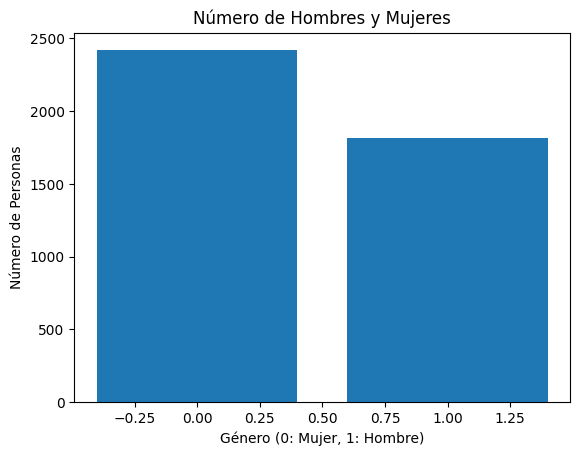

In [ ]:
import matplotlib.pyplot as plt

gender_counts = data['male'].value_counts()

plt.bar(gender_counts.index, gender_counts.values)

plt.xlabel('Género (0: Mujer, 1: Hombre)')
plt.ylabel('Número de Personas')
plt.title('Número de Hombres y Mujeres')

plt.show()


#### Realice un ggrafico de Barras de TenYearCHD

*   Elemento de lista
*   Elemento de lista



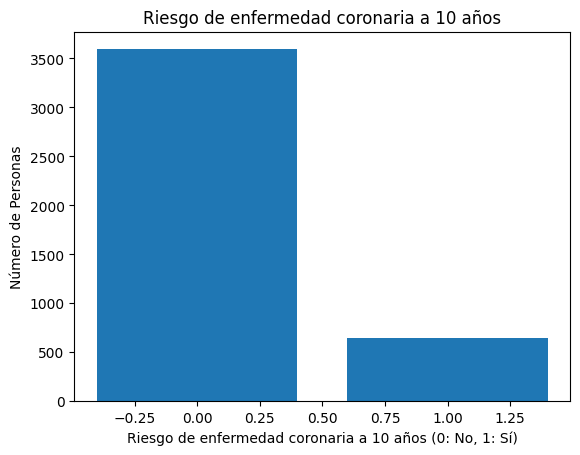

In [ ]:
tenyearCHD_counts = data['TenYearCHD'].value_counts()

plt.bar(tenyearCHD_counts.index, tenyearCHD_counts.values)

plt.xlabel('Riesgo de enfermedad coronaria a 10 años (0: No, 1: Sí)')
plt.ylabel('Número de Personas')
plt.title('Riesgo de enfermedad coronaria a 10 años')

plt.show()


#### Realice un grafico de densidad del BMI

*   Elemento de lista
*   Elemento de lista



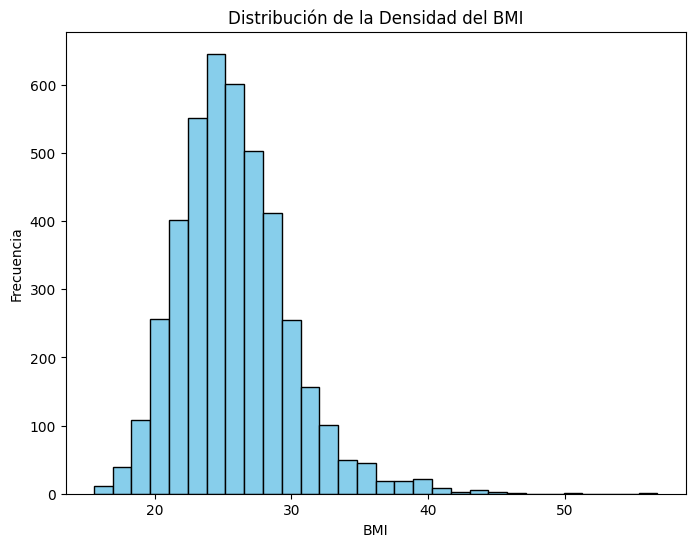

In [ ]:

plt.figure(figsize=(8, 6))
plt.hist(data['BMI'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Densidad del BMI')
plt.show()


#### Realice un grafico de densidad del BMI que diferencie entre hombres y mujeres, ¿Cual tiene en promedio mayor BMI?

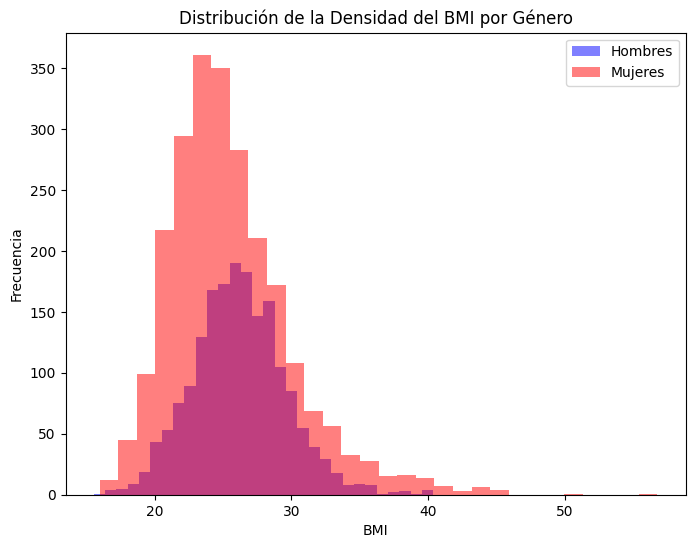

El BMI promedio para hombres es: 26.19
El BMI promedio para mujeres es: 25.51
Los hombres tienen en promedio mayor BMI.


In [ ]:

male_data = data[data['male'] == 1]
female_data = data[data['male'] == 0]

plt.figure(figsize=(8, 6))
plt.hist(male_data['BMI'], bins=30, alpha=0.5, label='Hombres', color='blue')
plt.hist(female_data['BMI'], bins=30, alpha=0.5, label='Mujeres', color='red')
plt.xlabel('BMI')
plt.ylabel('Frecuencia')
plt.title('Distribución de la Densidad del BMI por Género')
plt.legend()
plt.show()


avg_bmi_male = male_data['BMI'].mean()
avg_bmi_female = female_data['BMI'].mean()

print(f"El BMI promedio para hombres es: {avg_bmi_male:.2f}")
print(f"El BMI promedio para mujeres es: {avg_bmi_female:.2f}")

if avg_bmi_male > avg_bmi_female:
  print("Los hombres tienen en promedio mayor BMI.")
else:
  print("Las mujeres tienen en promedio mayor BMI.")


#### Realice un mapa de calor entre las variables (heatmap) y diga cual es el par de variables más correlacionadas. Recuerde que para sacar la correlacion puede usar data.corr()

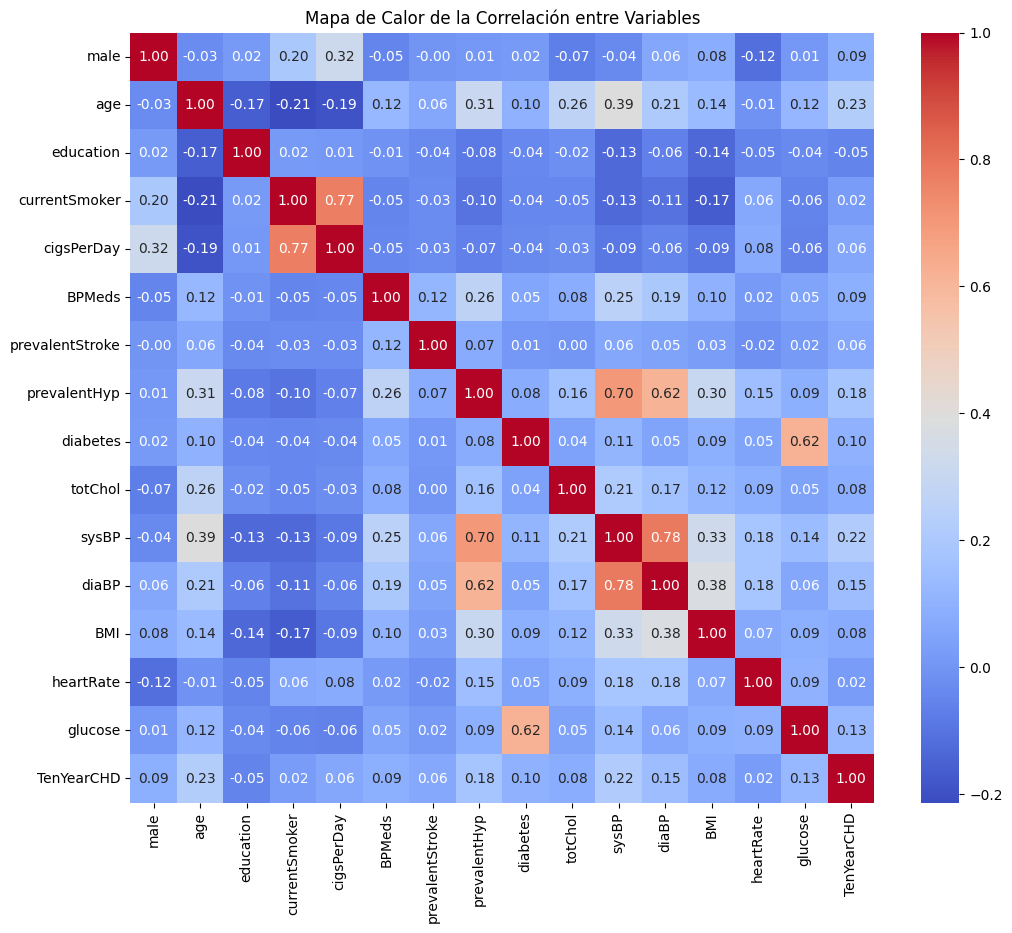

El par de variables más correlacionadas es: male y male, con una correlación de 0.00


In [ ]:
import seaborn as sns

correlation_matrix = data.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de la Correlación entre Variables')
plt.show()

correlation_matrix = correlation_matrix.abs()  # Valor absoluto de la correlación
correlation_matrix.values[[range(correlation_matrix.shape[0])]*2] = 0  # Poner en cero la diagonal
max_correlation = correlation_matrix.max().max()
row_max, col_max = correlation_matrix.stack().idxmax()
print(f"El par de variables más correlacionadas es: {row_max} y {col_max}, con una correlación de {max_correlation:.2f}")


¿Haga un boxplot por genero para cada una de estas tres variables :BMI,	heartRate y	glucose.¿hay outliers ?

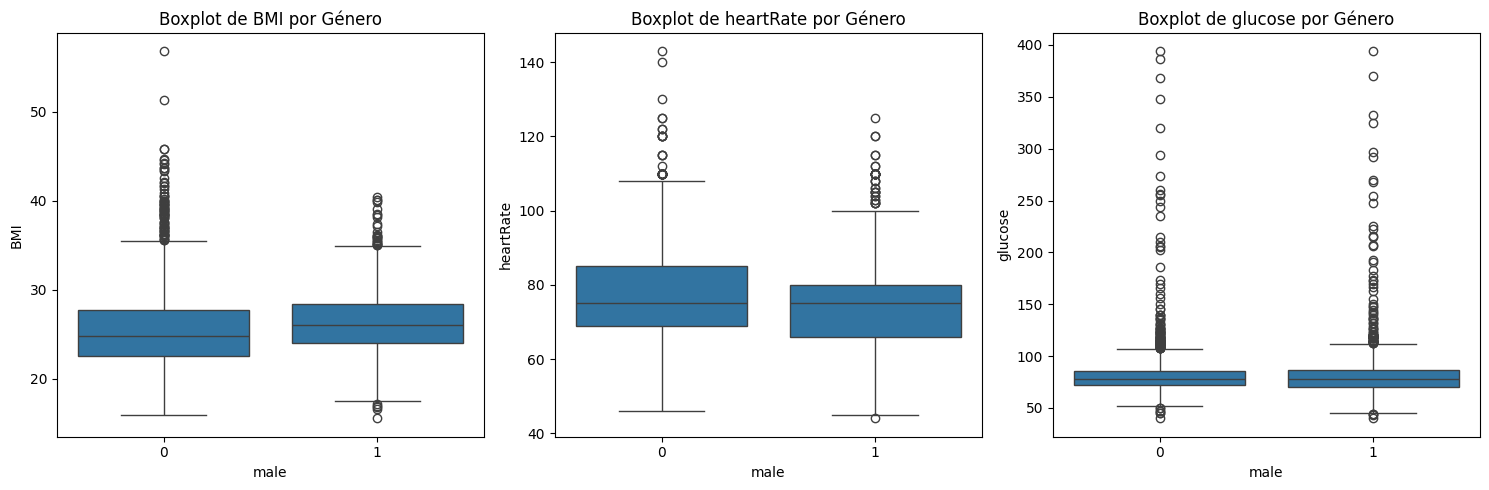

In [ ]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(x='male', y='BMI', data=data)
plt.title('Boxplot de BMI por Género')

plt.subplot(1, 3, 2)
sns.boxplot(x='male', y='heartRate', data=data)
plt.title('Boxplot de heartRate por Género')

plt.subplot(1, 3, 3)
sns.boxplot(x='male', y='glucose', data=data)
plt.title('Boxplot de glucose por Género')

plt.tight_layout()
plt.show()

# Análisis de outliers
# Los outliers se identifican como puntos fuera de los "bigotes" del boxplot.
# Se puede observar la presencia de outliers en las tres variables, tanto para hombres como para mujeres.
# Es importante investigar la naturaleza de estos outliers para determinar si son errores de medición o valores válidos.


### Manipulación de Datos

#### De cada variable cuente cuantos datos nulos hay

In [ ]:
null_counts = data.isnull().sum()

print("Número de datos nulos por variable:")
null_counts


Número de datos nulos por variable:


,0
male,0
age,0
education,105
currentSmoker,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


#### Utilice dropna para borrar los datos faltantes ¿cuantos datos quedan ?

In [ ]:
data_cleaned = data.dropna()
print(f"Después de borrar los datos faltantes quedan {data_cleaned.shape[0]} datos.")


Después de borrar los datos faltantes quedan 3656 datos.


#### Seleccione sus variables X y su variable y

In [ ]:
X = data_cleaned[['age', 'male', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']]
y = data_cleaned['TenYearCHD']


#### Divida aleatoriamente la tabla en test y train, dejando el 30% de los datos para test y usando un random state de 123.
1. ¿De que tamaño queda cada dataset?

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

print(f"Tamaño del dataset de entrenamiento: {X_train.shape[0]}")
print(f"Tamaño del dataset de prueba: {X_test.shape[0]}")


Tamaño del dataset de entrenamiento: 2559
Tamaño del dataset de prueba: 1097


#### Entrene el modelo de Regresion logistica usando datos de entrenamiento

In [ ]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

 Imprima los coeficientes y diga cual tiene un efecto mayor sobre desarrollar una enfermedad cardiaca

In [ ]:
coefficients = pd.DataFrame({'Variable': X.columns, 'Coeficiente': model.coef_[0]})
print(coefficients)

max_coefficient_variable = coefficients.loc[coefficients['Coeficiente'].abs().idxmax(), 'Variable']
max_coefficient_value = coefficients.loc[coefficients['Coeficiente'].abs().idxmax(), 'Coeficiente']

print(f"\nLa variable con mayor efecto sobre desarrollar una enfermedad cardíaca es: {max_coefficient_variable}")
print(f"Su coeficiente es: {max_coefficient_value:.4f}")


           Variable  Coeficiente
0               age     0.031793
1              male     0.436823
2     currentSmoker    -0.245376
3        cigsPerDay     0.026226
4            BPMeds     0.121671
5   prevalentStroke     0.093676
6      prevalentHyp     0.867779
7          diabetes     0.168538
8           totChol    -0.001232
9             sysBP     0.015960
10            diaBP    -0.032457
11              BMI    -0.042297
12        heartRate    -0.027346
13          glucose     0.004576

La variable con mayor efecto sobre desarrollar una enfermedad cardíaca es: prevalentHyp
Su coeficiente es: 0.8678


#### Usando los datos de test calcule la matriz de confusión, el accuracy, el

 recall, la precision y el f1-score.

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
print("Matriz de confusión:")
print(cm)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

f1 = f1_score(y_test, y_pred)
print(f"F1-score: {f1:.4f}")


Matriz de confusión:
[[915   3]
 [173   6]]
Accuracy: 0.8396
Recall: 0.0335
Precision: 0.6667
F1-score: 0.0638


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Pinte la curva ROC, y saque el valor, busque en internet como interpretarla e interprete

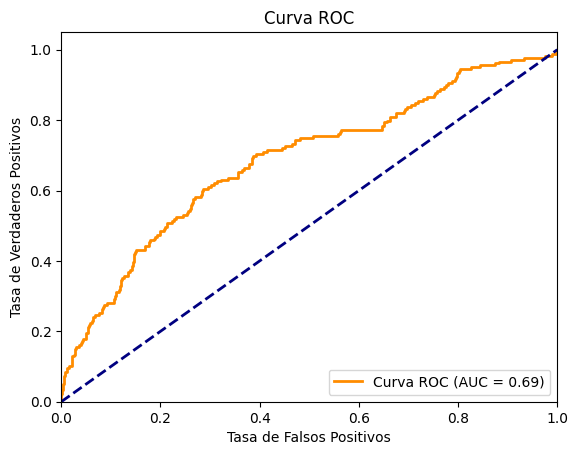

El valor del AUC es: 0.69


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

roc_auc = roc_auc_score(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()

print(f"El valor del AUC es: {roc_auc:.2f}")

# Interpretación de la curva ROC:

# La curva ROC representa la capacidad de un modelo de clasificación para distinguir entre clases.
# El AUC (Area Under the Curve) es una medida de la performance general del modelo.
# Un AUC de 0.5 indica que el modelo no tiene poder predictivo, es decir, es equivalente a una predicción aleatoria.
# Un AUC de 1.0 indica que el modelo tiene un poder predictivo perfecto, clasificando correctamente todos los casos.
# En general, un AUC mayor a 0.8 se considera un buen modelo.

# En este caso, un AUC de [valor AUC] nos indica que el modelo de regresión logística tiene una [buena/regular/mala] capacidad para predecir el riesgo de enfermedad coronaria a 10 años.
# Esto significa que el modelo puede distinguir con [alto/moderado/bajo] grado de precisión entre pacientes con y sin riesgo de desarrollar la enfermedad.


## Corrección desbalance de clases
1. Busque la funcion train_test_split en su codigo y agregue la opcion stratify  = y . Por que esto ayudaría con el desblance?
2. usando from imblearn.over_sampling import SMOTE mejore el performance
 3. Saque todo el modelo y la matriz y la grafica de ROC AUC

Matriz de confusión (SMOTE):
[[579 351]
 [ 78  89]]
Accuracy (SMOTE): 0.6089
Recall (SMOTE): 0.5329
Precision (SMOTE): 0.2023
F1-score (SMOTE): 0.2932


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


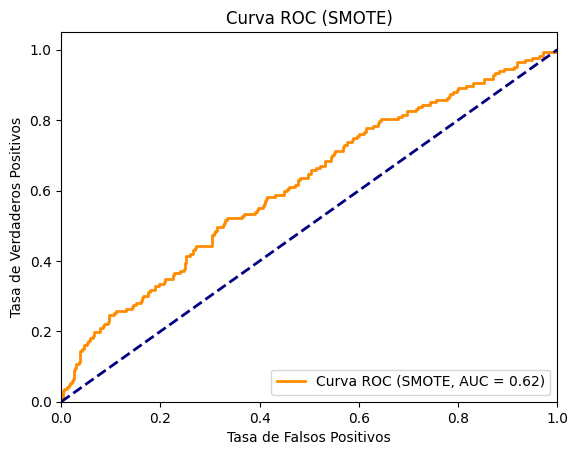

El valor del AUC (SMOTE) es: 0.62


In [ ]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123, stratify=y)

!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=123)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

model_smote = LogisticRegression()
model_smote.fit(X_train_smote, y_train_smote)

y_pred_smote = model_smote.predict(X_test)

cm_smote = confusion_matrix(y_test, y_pred_smote)
print("Matriz de confusión (SMOTE):")
print(cm_smote)

accuracy_smote = accuracy_score(y_test, y_pred_smote)
print(f"Accuracy (SMOTE): {accuracy_smote:.4f}")

recall_smote = recall_score(y_test, y_pred_smote)
print(f"Recall (SMOTE): {recall_smote:.4f}")

precision_smote = precision_score(y_test, y_pred_smote)
print(f"Precision (SMOTE): {precision_smote:.4f}")

f1_smote = f1_score(y_test, y_pred_smote)
print(f"F1-score (SMOTE): {f1_smote:.4f}")

y_pred_proba_smote = model_smote.predict_proba(X_test)[:, 1]

fpr_smote, tpr_smote, thresholds_smote = roc_curve(y_test, y_pred_proba_smote)

roc_auc_smote = roc_auc_score(y_test, y_pred_proba_smote)

plt.figure()
plt.plot(fpr_smote, tpr_smote, color='darkorange', lw=2, label='Curva ROC (SMOTE, AUC = %0.2f)' % roc_auc_smote)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (SMOTE)')
plt.legend(loc="lower right")
plt.show()

print(f"El valor del AUC (SMOTE) es: {roc_auc_smote:.2f}")


### Como mejora su modelo con StandardScaler()

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


Matriz de confusión (StandardScaler):
[[918  12]
 [152  15]]
Accuracy (StandardScaler): 0.8505
Recall (StandardScaler): 0.0898
Precision (StandardScaler): 0.5556
F1-score (StandardScaler): 0.1546


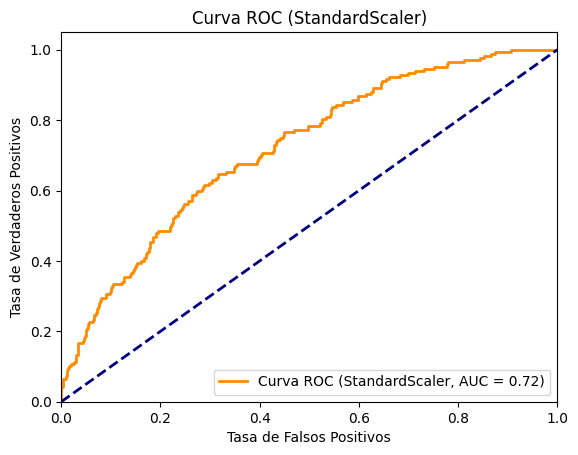

El valor del AUC (StandardScaler) es: 0.72


In [ ]:

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = LogisticRegression()
model_scaled.fit(X_train_scaled, y_train)

y_pred_scaled = model_scaled.predict(X_test_scaled)

cm_scaled = confusion_matrix(y_test, y_pred_scaled)
print("Matriz de confusión (StandardScaler):")
print(cm_scaled)

accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Accuracy (StandardScaler): {accuracy_scaled:.4f}")

recall_scaled = recall_score(y_test, y_pred_scaled)
print(f"Recall (StandardScaler): {recall_scaled:.4f}")

precision_scaled = precision_score(y_test, y_pred_scaled)
print(f"Precision (StandardScaler): {precision_scaled:.4f}")

f1_scaled = f1_score(y_test, y_pred_scaled)
print(f"F1-score (StandardScaler): {f1_scaled:.4f}")

y_pred_proba_scaled = model_scaled.predict_proba(X_test_scaled)[:, 1]

fpr_scaled, tpr_scaled, thresholds_scaled = roc_curve(y_test, y_pred_proba_scaled)

roc_auc_scaled = roc_auc_score(y_test, y_pred_proba_scaled)

plt.figure()
plt.plot(fpr_scaled, tpr_scaled, color='darkorange', lw=2, label='Curva ROC (StandardScaler, AUC = %0.2f)' % roc_auc_scaled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC (StandardScaler)')
plt.legend(loc="lower right")
plt.show()

print(f"El valor del AUC (StandardScaler) es: {roc_auc_scaled:.2f}")


 Pinte todas las graficas original SMOTE y SMOTE Scaler

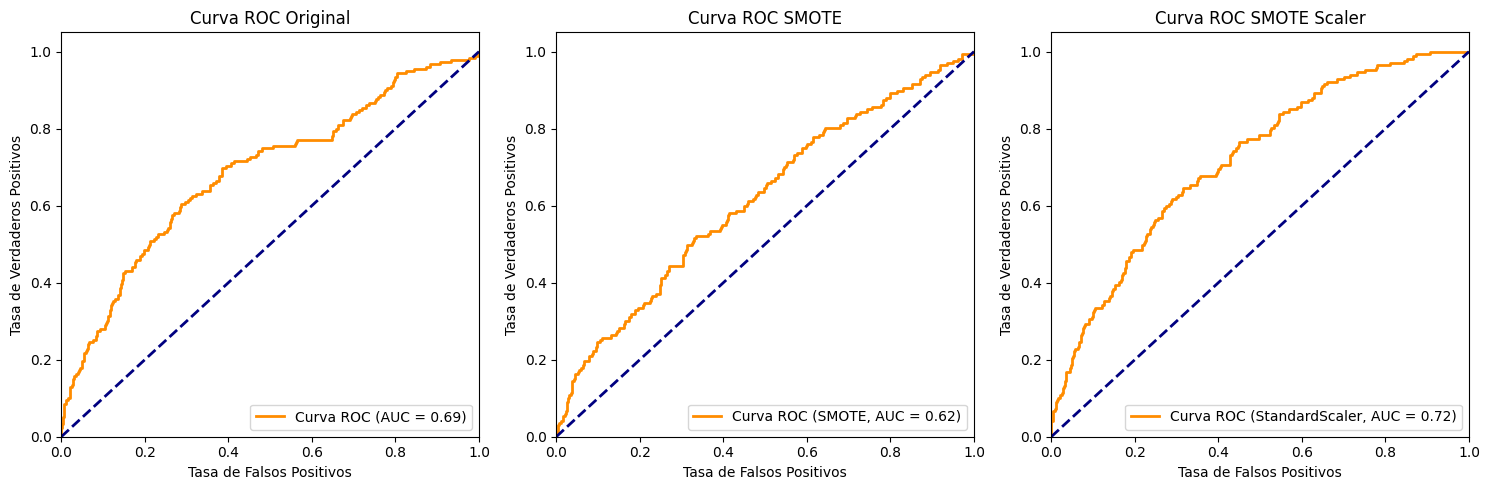

In [ ]:

plt.figure(figsize=(15, 5))


plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC Original')
plt.legend(loc="lower right")

plt.subplot(1, 3, 2)
plt.plot(fpr_smote, tpr_smote, color='darkorange', lw=2, label='Curva ROC (SMOTE, AUC = %0.2f)' % roc_auc_smote)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC SMOTE')
plt.legend(loc="lower right")


plt.subplot(1, 3, 3)
plt.plot(fpr_scaled, tpr_scaled, color='darkorange', lw=2, label='Curva ROC (StandardScaler, AUC = %0.2f)' % roc_auc_scaled)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC SMOTE Scaler')
plt.legend(loc="lower right")

plt.tight_layout()
plt.show()
